In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sklearn
from typing import Tuple

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [2]:
'''
Készíts egy függvényt, betölti majd vissza adja az iris adathalmazt.


Egy példa a kimenetre: iris
return type: sklearn.utils.Bunch
függvény neve: load_iris_data
'''

'\nKészíts egy függvényt, betölti majd vissza adja az iris adathalmazt.\n\n\nEgy példa a kimenetre: iris\nreturn type: sklearn.utils.Bunch\nfüggvény neve: load_iris_data\n'

In [3]:
def load_iris_data() -> sklearn.utils.Bunch:
    iris = load_iris()
    return iris

In [4]:
# li = load_iris_data()
# print(type(li))

<class 'sklearn.utils._bunch.Bunch'>


In [5]:
'''
Készíts egy függvényt, ami a betölti az virágokhoz tartozó levél méretket egy dataframebe, majd az első 5 sort visszaadja.
Minden oszlop tartalmazza, hogy az milyen mérethez tartozik.

Egy példa a bemenetre: iris
Egy példa a kimenetre: iris_df
return type: pandas.core.frame.DataFrame
függvény neve: check_data
'''

'\nKészíts egy függvényt, ami a betölti az virágokhoz tartozó levél méretket egy dataframebe, majd az első 5 sort visszaadja.\nMinden oszlop tartalmazza, hogy az milyen mérethez tartozik.\n\nEgy példa a bemenetre: iris\nEgy példa a kimenetre: iris_df\nreturn type: pandas.core.frame.DataFrame\nfüggvény neve: check_data\n'

In [6]:
def check_data(iris) -> pd.core.frame.DataFrame:
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    return df.head(5)


In [7]:
# check_data(li)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy lineaáris regressziós model feltanításához.
Featurejeink legyenek a levél méretek kivéve a "sepal length (cm)", ez legyen a targetünk.

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: linear_train_data
'''

' \nKészíts egy függvényt ami előkészíti az adatokat egy lineaáris regressziós model feltanításához.\nFeaturejeink legyenek a levél méretek kivéve a "sepal length (cm)", ez legyen a targetünk.\n\nEgy példa a bemenetre: iris\nEgy példa a kimenetre: X, y\nreturn type: (numpy.ndarray, numpy.ndarray)\nfüggvény neve: linear_train_data\n'

In [9]:
def linear_train_data(iris) -> Tuple[np.ndarray, np.ndarray]:
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    X = df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
    y = df['sepal length (cm)'].values
    return X, y

In [10]:
# lin_x, lin_y = linear_train_data(li)

In [11]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy logisztikus regressziós model feltanításához.
Featurejeink legyenek a levél méretek, targetünk pedig a 0, 1-es virág osztályok.
Fontos csak azokkal az adatokkal tanítsunk amihez tartozik adott target. 

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: logistic_train_data
'''

' \nKészíts egy függvényt ami előkészíti az adatokat egy logisztikus regressziós model feltanításához.\nFeaturejeink legyenek a levél méretek, targetünk pedig a 0, 1-es virág osztályok.\nFontos csak azokkal az adatokkal tanítsunk amihez tartozik adott target. \n\nEgy példa a bemenetre: iris\nEgy példa a kimenetre: X, y\nreturn type: (numpy.ndarray, numpy.ndarray)\nfüggvény neve: logistic_train_data\n'

In [12]:
def logistic_train_data(iris) -> Tuple[np.ndarray, np.ndarray]:
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    X = df.loc[np.where(iris.target < 2)].values
    y = iris.target[np.where(iris.target < 2)]

    return X, y

In [13]:
# log_x, log_y = logistic_train_data(li)

In [14]:
'''
Készíts egy függvényt ami feldarabolja az adatainkat train és test részre. Az adatok 20%-át használjuk fel a teszteléshez.
Tegyük determenisztikussá a darabolást, ennek értéke legyen 42.

Egy példa a bemenetre: X, y
Egy példa a kimenetre: X_train, X_test, y_train, y_test
return type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)
függvény neve: split_data
'''

'\nKészíts egy függvényt ami feldarabolja az adatainkat train és test részre. Az adatok 20%-át használjuk fel a teszteléshez.\nTegyük determenisztikussá a darabolást, ennek értéke legyen 42.\n\nEgy példa a bemenetre: X, y\nEgy példa a kimenetre: X_train, X_test, y_train, y_test\nreturn type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)\nfüggvény neve: split_data\n'

In [21]:
def split_data(X, y) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(lin_x, lin_y)
# X_logistic_train, X_logistic_test, y_logistic_train, y_logistic_test = train_test_split(log_x, log_y)

In [34]:
'''
Készíts egy függvényt ami feltanít egy lineaáris regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LinearRegression
függvény neve: train_linear_regression
'''

'\nKészíts egy függvényt ami feltanít egy lineaáris regressziós modelt, majd visszatér vele.\n\nEgy példa a bemenetre: X_train, y_train\nEgy példa a kimenetre: model\nreturn type: sklearn.linear_model._base.LinearRegression\nfüggvény neve: train_linear_regression\n'

In [35]:
def train_linear_regression(X_train, y_train) -> sklearn.linear_model._base.LinearRegression:
    return LinearRegression().fit(X_train, y_train)

In [36]:
# linr = train_linear_regression(X_linear_train, y_linear_train)
# print(type(linr))

<class 'sklearn.linear_model._base.LinearRegression'>


In [37]:
'''
Készíts egy függvényt ami feltanít egy logisztikus regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LogisticRegression
függvény neve: train_logistic_regression
'''

'\nKészíts egy függvényt ami feltanít egy logisztikus regressziós modelt, majd visszatér vele.\n\nEgy példa a bemenetre: X_train, y_train\nEgy példa a kimenetre: model\nreturn type: sklearn.linear_model._base.LogisticRegression\nfüggvény neve: train_logistic_regression\n'

In [38]:
def train_logistic_regression(X_train, y_train) -> sklearn.linear_model._logistic.LogisticRegression:
    return LogisticRegression(solver='liblinear', random_state=42).fit(X_train, y_train)

In [39]:
# logr = train_logistic_regression(X_logistic_train, y_logistic_train)
# print(type(logr))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [ ]:
''' 
Készíts egy függvényt, ami a feltanított modellel predikciót tud végre hajtani.

Egy példa a bemenetre: model, X_test
Egy példa a kimenetre: y_pred
return type: numpy.ndarray
függvény neve: predict
'''

In [40]:
def predict(model, X_test) -> np.ndarray:
    return model.predict(X_test)

In [41]:
# lin_pred = predict(linr, X_linear_test)
# log_pred = predict(logr, X_logistic_test)

In [43]:
'''
Készíts egy függvényt, ami vizualizálni tudja a label és a predikciók közötti eltérést.
Használj scatter plotot a diagram elkészítéséhez.

Diagram címe legyen: 'Actual vs Predicted Target Values'
Az x tengely címe legyen: 'Actual'
Az y tengely címe legyen: 'Predicted'

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: scatter plot
return type: matplotlib.figure.Figure
függvény neve: plot_actual_vs_predicted
'''

"\nKészíts egy függvényt, ami vizualizálni tudja a label és a predikciók közötti eltérést.\nHasználj scatter plotot a diagram elkészítéséhez.\n\nDiagram címe legyen: 'Actual vs Predicted Target Values'\nAz x tengely címe legyen: 'Actual'\nAz y tengely címe legyen: 'Predicted'\n\nEgy példa a bemenetre: y_test, y_pred\nEgy példa a kimenetre: scatter plot\nreturn type: matplotlib.figure.Figure\nfüggvény neve: plot_actual_vs_predicted\n"

In [45]:
def plot_actual_vs_predicted(y_test, y_pred) -> plt.Figure:
    fig, ax = plt.subplots()
    
    ax.set_title('Actual vs Predicted Target Values')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    ax.scatter(y_test, y_pred)

    return fig

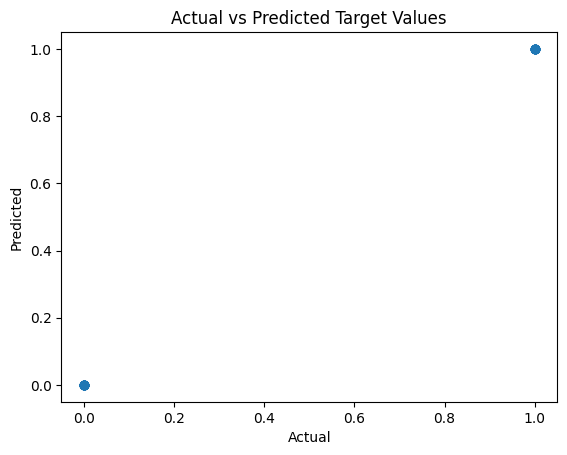

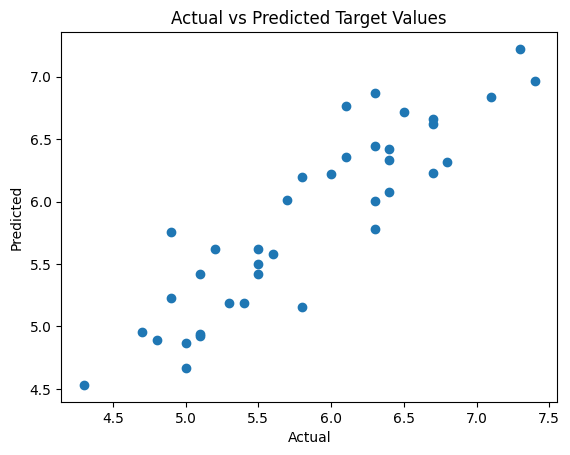

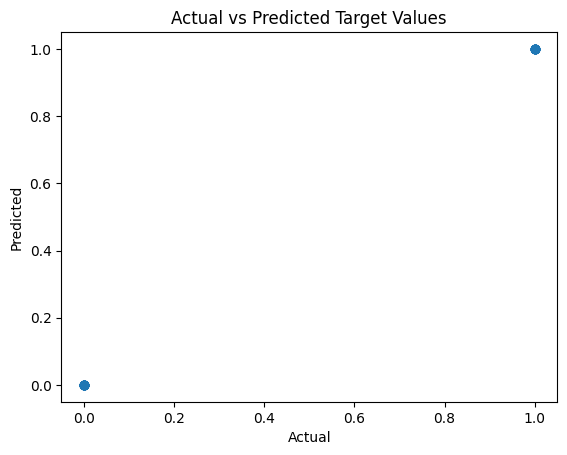

In [47]:
# plot_actual_vs_predicted(y_linear_test, lin_pred)
# plot_actual_vs_predicted(y_logistic_test, log_pred)

In [ ]:
''' 
Készíts egy függvényt, ami a Négyzetes hiba (MSE) értékét számolja ki a predikciók és a valós értékek között.

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: mse
return type: float
függvény neve: evaluate_model
'''

In [48]:
def evaluate_model(y_test, y_pred) -> float:
    return mean_squared_error(y_test, y_pred)

In [49]:
# evaluate_model(y_linear_test, lin_pred)
# evaluate_model(y_logistic_test, log_pred)

0.0